# Análise de séries temporais

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf
from statsmodels.tsa.seasonal import  seasonal_decompose

In [2]:
plt.style.use('seaborn')

## Aquisição dos dados de ações

In [3]:
ticker = yf.Ticker('^BVSP')

In [6]:
df = ticker.history(interval='1d', start='2018-01-01', end='2021-01-01')

In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0
2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0
2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0
2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0
2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0


In [8]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-22,115825.0,116903.0,115648.0,116348.0,6947900,0,0
2020-12-23,116636.0,118311.0,116636.0,117857.0,6483300,0,0
2020-12-28,117806.0,119213.0,117805.0,119051.0,7171700,0,0
2020-12-29,119130.0,119861.0,118750.0,119475.0,6769700,0,0
2020-12-30,119410.0,120150.0,118919.0,119306.0,8235700,0,0


## Decomposição de uma série temporal

__Modelo matemático__

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

* Modelo Atitivo $$y(t) = Trend(t) + Seasonality(t) + Noise(t)$$

* Modelo Multiplicativo $$y(t) = Trend(t) \times Seasonality(t) \times Noise(t)$$

In [9]:
close = df[['Close']]

In [10]:
decomposicao = seasonal_decompose(close, model='additive', period=30, extrapolate_trend=30)

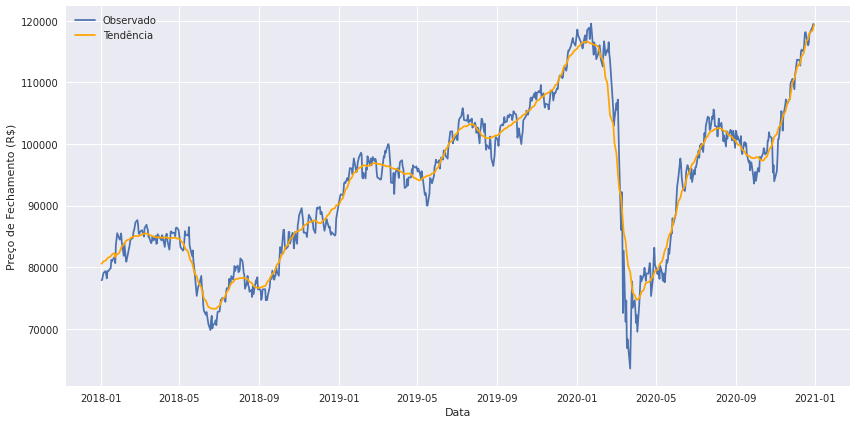

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(decomposicao.observed, label='Observado')
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (R$)')
plt.legend()
plt.tight_layout()
plt.show()

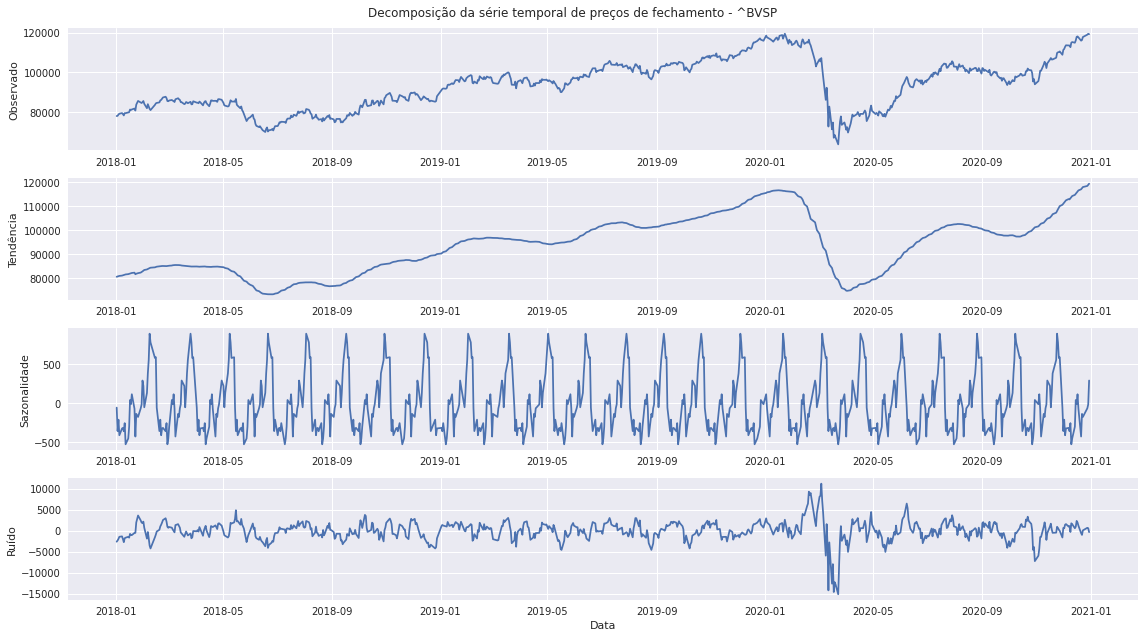

In [41]:
fig, ax = plt.subplots(4, 1, figsize=(16, 9))
plt.suptitle(f'Decomposição da série temporal de preços de fechamento - {ticker.ticker}')

ax[0].plot(decomposicao.observed)
ax[0].set_ylabel('Observado')

ax[1].plot(decomposicao.trend)
ax[1].set_ylabel('Tendência')

ax[2].plot(decomposicao.seasonal)
ax[2].set_ylabel('Sazonalidade')

ax[3].plot(decomposicao.resid)
ax[3].set_ylabel('Ruído')
ax[3].set_xlabel('Data')


plt.tight_layout()
plt.show()

## Média móvel

In [53]:
media_movel_7d = close['Close'].rolling(7).mean()
media_movel_14d = close['Close'].rolling(14).mean()
media_movel_21d = close['Close'].rolling(21).mean()

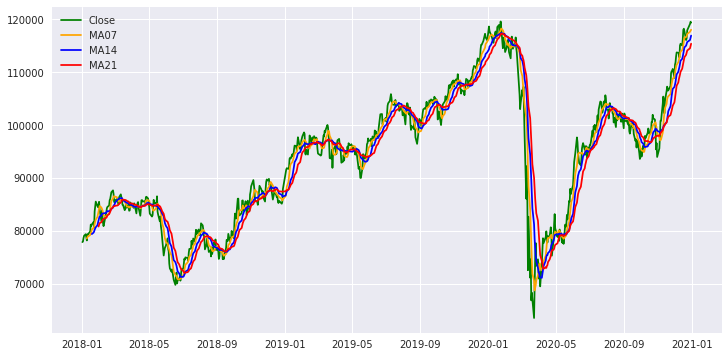

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(close['Close'], color='green', label='Close')
plt.plot(media_movel_7d, color='orange', label='MA07')
plt.plot(media_movel_14d, color='blue', label='MA14')
plt.plot(media_movel_21d, color='red', label='MA21')
plt.legend()
plt.show()

In [57]:
close['rentabilidade'] = close['Close'].pct_change()
close.head()

/tmp/ipykernel_2948/3027928017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close['rentabilidade'] = close['Close'].pct_change()


,Close,MA7,rentabilidade
Date,,,
2018-01-02,77891.0,NaN,NaN
2018-01-03,77995.0,NaN,0.001335
2018-01-04,78647.0,NaN,0.008360
2018-01-05,79071.0,NaN,0.005391
2018-01-08,79379.0,NaN,0.003895
